In [1]:
from google.colab import drive 
drive.mount('gdrive')

Mounted at gdrive


In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras import layers, models, backend as K, callbacks
from keras.layers import LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from sklearn import preprocessing
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras import regularizers
from keras.layers import TimeDistributed
import math
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import decimal
import csv
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.metrics import plot_roc_curve, auc
import collections
import seaborn as sns

In [26]:
stock_market_df = pd.read_csv('/content/gdrive/MyDrive/Stock_market_label_data.csv')
stock_market_df = stock_market_df[: 15850]
stock_market_df['Match'] = stock_market_df['Match'].astype(int)
stock_market_df['Match'] = stock_market_df['Match'].replace([-1], 0)
stock_market_df.drop(columns=['Company_Name', 'Unnamed: 0', 'Date', 'Name'], inplace=True)
stock_market_df.fillna(0)
stock_market_df = stock_market_df[: 15862]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
stock_market_df_1 = stock_market_df.drop(columns=['Match'])
X=stock_market_df_1.values.astype(float)
y= stock_market_df['Match'].values.astype(float)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [7]:
pca = PCA(n_components = 82)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [8]:
value_list = pca.explained_variance_.tolist()
key_list = stock_market_df_1.columns.to_list()
zip_iterator = zip(key_list, value_list)
a_dictionary = dict(zip_iterator)
sorted_dict = collections.OrderedDict(a_dictionary)

In [9]:
features_list = list(sorted_dict)[40:]
for key in features_list:
  stock_market_df_1.drop(columns=[key], inplace=True)

In [10]:
X_new = stock_market_df_1.values.astype(float)
y = y

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_new = scaler.fit_transform(X_new)

In [12]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# ***XGBClassifier -  40 feature selection***

In [13]:
model = XGBClassifier()

In [14]:
model.fit(X_new_train, y_new_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [17]:
y_pred = model.predict(X_new_test)
accuracy = accuracy_score(y_new_test, y_pred)

In [18]:
accuracy

0.7466876971608832

In [ ]:
test_pred_prob= model.predict_proba(X_new_test)
test_pred_prob[:5]

In [20]:
test_pred_prob = test_pred_prob[:,1]

In [21]:
fpr, tpr, threshold = roc_curve (y_new_test,test_pred_prob, pos_label = 1)
auc_rf = auc(fpr, tpr)
auc_rf

0.8169989041516849

In [22]:
roc_auc_score(y_new_test, y_pred)

0.7466693654867091

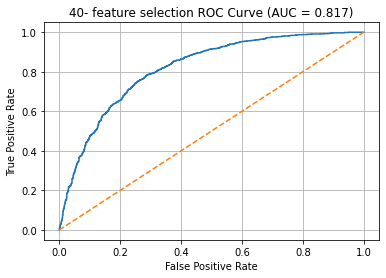

In [24]:
plt.plot(fpr, tpr)
plt.plot([0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title ("40- feature selection ROC Curve (AUC = {:.3f})".format(auc_rf))
plt.grid()
plt.show()

# ***XGBClassifier - 20 feature selection***

In [70]:
stock_market_df = pd.read_csv('/content/gdrive/MyDrive/Stock_market_label_data.csv')
stock_market_df = stock_market_df[: 15850]
stock_market_df['Match'] = stock_market_df['Match'].astype(int)
stock_market_df['Match'] = stock_market_df['Match'].replace([-1], 0)
stock_market_df.drop(columns=['Company_Name', 'Unnamed: 0', 'Date', 'Name'], inplace=True)
stock_market_df.fillna(0)
stock_market_df = stock_market_df[: 15862]
stock_market_df_1 = stock_market_df.drop(columns=['Match'])
X=stock_market_df_1.values.astype(float)
y= stock_market_df['Match'].values.astype(float)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
features_list = list(sorted_dict)[20:]
len(features_list)
column_companies_list = ['XOM', 'JPM', 'AAPL', 'MSFT', 'GE', 'JNJ', 'WFC','AMZN']
for company in column_companies_list:
  features_list.remove(company)
for key in features_list:
  stock_market_df_1.drop(columns=[key], inplace=True)

In [72]:
X_new_20 = stock_market_df_1.values.astype(float)
y = y

scaler = MinMaxScaler(feature_range=(0, 1))
X_new_20 = scaler.fit_transform(X_new_20)

X_new_train_20, X_new_test_20, y_new_train_20, y_new_test_20 = train_test_split(X_new_20, y, test_size=0.2, random_state=42)

In [73]:
model_20 = XGBClassifier()
model_20.fit(X_new_train_20, y_new_train_20)
y_pred_20 = model_20.predict(X_new_test_20)
accuracy_20 = accuracy_score(y_new_test_20, y_pred_20)
print(accuracy_20)

0.749211356466877


In [74]:
y_pred_20.shape

(3170,)

In [75]:
test_pred_prob_20= model_20.predict_proba(X_new_test_20)
test_pred_prob_20 = test_pred_prob_20[:,1]
fpr_20, tpr_20, threshold_20 = roc_curve (y_new_test_20,test_pred_prob_20, pos_label = 1)
auc_rf_20 = auc(fpr_20, tpr_20)
roc_auc_score(y_new_test_20, y_pred_20)

0.7491930408656285

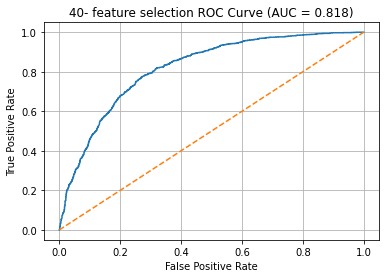

In [76]:
plt.plot(fpr_20, tpr_20)
plt.plot([0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title ("40- feature selection ROC Curve (AUC = {:.3f})".format(auc_rf_20))
plt.grid()
plt.show()

In [77]:
stock_market_df = pd.read_csv('/content/gdrive/MyDrive/Stock_market_label_data.csv')
stock_market_df = stock_market_df[: 15850]
stock_market_df['Match'] = stock_market_df['Match'].astype(int)
stock_market_df['Match'] = stock_market_df['Match'].replace([-1], 0)
stock_market_df.drop(columns=['Company_Name', 'Unnamed: 0', 'Date', 'Name'], inplace=True)
stock_market_df.fillna(0)
stock_market_df = stock_market_df[: 15862]
stock_market_df_1 = stock_market_df.drop(columns=['Match'])
X=stock_market_df_1.values.astype(float)
y= stock_market_df['Match'].values.astype(float)

features_list = list(sorted_dict)[50:]
len(features_list)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


32

In [78]:
for key in features_list:
  stock_market_df_1.drop(columns=[key], inplace=True)

X_new_50 = stock_market_df_1.values.astype(float)
y = y

scaler = MinMaxScaler(feature_range=(0, 1))
X_new_50 = scaler.fit_transform(X_new_50)

In [79]:
X_new_train_50, X_new_test_50, y_new_train_50, y_new_test_50 = train_test_split(X_new_50, y, test_size=0.2, random_state=42)

In [80]:
model_50 = XGBClassifier()
model_50.fit(X_new_train_50, y_new_train_50)
y_pred_50 = model_50.predict(X_new_test_50)
accuracy_50 = accuracy_score(y_new_test_50, y_pred_50)
print(accuracy_50)

0.7463722397476341


In [81]:
test_pred_prob_50= model_50.predict_proba(X_new_test_50)
test_pred_prob_50 = test_pred_prob_50[:,1]
fpr_50, tpr_50, threshold_20 = roc_curve (y_new_test_50,test_pred_prob_50, pos_label = 1)
auc_rf_50 = auc(fpr_50, tpr_50)

In [82]:
roc_auc_score(y_new_test_50, y_pred_50)

0.7463451488311681

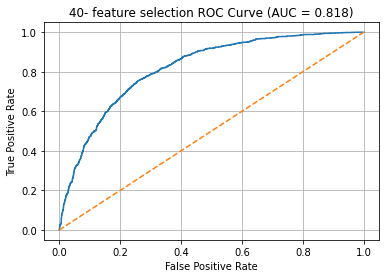

In [83]:
plt.plot(fpr_50, tpr_50)
plt.plot([0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title ("40- feature selection ROC Curve (AUC = {:.3f})".format(auc_rf_50))
plt.grid()
plt.show()

# ***All features***

In [2]:
stock_market_df = pd.read_csv('/content/gdrive/MyDrive/Stock_market_label_data.csv')
stock_market_df = stock_market_df[: 15850]
stock_market_df['Match'] = stock_market_df['Match'].astype(int)
stock_market_df['Match'] = stock_market_df['Match'].replace([-1], 0)
stock_market_df.drop(columns=['Company_Name', 'Unnamed: 0', 'Date', 'Name'], inplace=True)
stock_market_df.fillna(0)
stock_market_df = stock_market_df[: 15862]
stock_market_df_1 = stock_market_df.drop(columns=['Match'])
X=stock_market_df_1.values.astype(float)
y= stock_market_df['Match'].values.astype(float)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_new_all = scaler.fit_transform(X)

In [89]:
X_new_train_all, X_new_test_all, y_new_train_all, y_new_test_all = train_test_split(X_new_all, y, test_size=0.2, random_state=42)

In [91]:
model_all = XGBClassifier()
model_all.fit(X_new_train_all, y_new_train_all)
y_pred_all = model_all.predict(X_new_test_all)
accuracy_all = accuracy_score(y_new_test_all, y_pred_all)
print(accuracy_all)

test_pred_prob_all= model_all.predict_proba(X_new_test_all)
test_pred_prob_all = test_pred_prob_all[:,1]
fpr_all, tpr_all, threshold_all = roc_curve (y_new_test_all,test_pred_prob_all, pos_label = 1)
auc_rf_all = auc(fpr_all, tpr_all)

print("roc_auc_score")
roc_auc_score(y_new_test_all, y_pred_all)

0.7470031545741325
roc_auc_score


0.7469776599001118

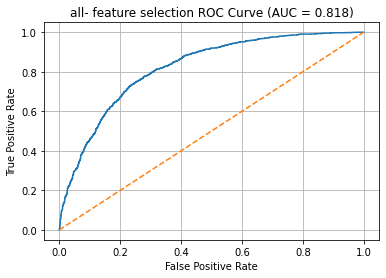

In [92]:
plt.plot(fpr_all, tpr_all)
plt.plot([0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title ("all- feature selection ROC Curve (AUC = {:.3f})".format(auc_rf_50))
plt.grid()
plt.show()

# **Performence curve for XGB Classifier**

ValueError: ignored

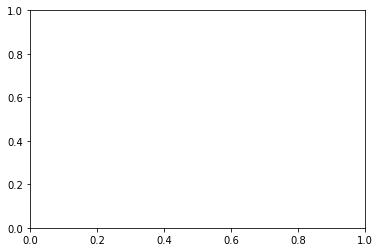

In [2]:
features = [20, 40, 50, 82]
roc_auc_score_list = [0.7491930408656285, 0.7466693654867091, 0.7463451488311681, 0.7469776599001118]

ypoints = np.array(roc_auc_score_list)
xpoints = np.array(features)

plt.plot(xpoints, ypoints, color = 'r')
plt.xlabel = features
plt.show()

# **MAking functions**

In [4]:
def createDataFrame():
  stock_market_df = pd.read_csv('/content/gdrive/MyDrive/Stock_market_label_data.csv')
  stock_market_df = stock_market_df[: 15850]
  stock_market_df['Match'] = stock_market_df['Match'].astype(int)
  stock_market_df['Match'] = stock_market_df['Match'].replace([-1], 0)
  stock_market_df.drop(columns=['Company_Name', 'Unnamed: 0', 'Date', 'Name'], inplace=True)
  stock_market_df.fillna(0)
  stock_market_df = stock_market_df[: 15862]
  return stock_market_df

def createY(stock_market_df):
  y= stock_market_df['Match'].values.astype(float)
  return y

def createX(stock_market_df):
  stock_market_df_1 = stock_market_df.drop(columns=['Match'])
  stock_market_df_1 = createDataFrame()
  X=stock_market_df_1.values.astype(float)
  return X

def applyNormalisation(X):
  scaler = MinMaxScaler(feature_range=(0, 1))
  X = scaler.fit_transform(X)
  return X

def splitData(X, y):
  X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return (X_new_train, X_new_test, y_new_train, y_new_test)

def applyPCAandGetfeatureDict(stock_market_df, n, X_train, X_test):
  stock_market_df_1 = stock_market_df.drop(columns=['Match'])
  pca = PCA(n_components = 82)
  pca.fit(X_train)

  X_train = pca.fit_transform(X_train)
  X_test = pca.fit_transform(X_test)

  value_list = pca.explained_variance_.tolist()
  key_list = stock_market_df_1.columns.to_list()

  zip_iterator = zip(key_list, value_list)
  a_dictionary = dict(zip_iterator)
  sorted_dict = collections.OrderedDict(a_dictionary)

  return sorted_dict

def featureSelection(stock_market_df, sorted_dict, num_features):
  stock_market_df_1 = stock_market_df.drop(columns=['Match'])
  features_list = list(sorted_dict)[num_features:]
  if num_features <= 40:
    column_companies_list = ['XOM', 'JPM', 'AAPL', 'MSFT', 'GE', 'JNJ', 'WFC','AMZN']
    for company in column_companies_list:
      try:
        features_list.remove(company)
      except:
        continue
  for key in features_list:
    stock_market_df_1.drop(columns=[key], inplace=True)
  return stock_market_df_1

def applyNormlisation(X):
  scaler = MinMaxScaler(feature_range=(0, 1))
  X = scaler.fit_transform(X)
  return X

def splitPCAdata(n):
  stock_market_df = createDataFrame()
  X = createX(stock_market_df)
  y = createY(stock_market_df)
  X = applyNormalisation(X)
  X_new_train, X_new_test, y_new_train, y_new_test = splitData(X, y)
  sorted_dict = applyPCAandGetfeatureDict(stock_market_df, n, X_new_train, X_new_test)
  feature_selection_Df = featureSelection(stock_market_df, sorted_dict, n)
  X = feature_selection_Df.values.astype(float)
  y = y
  X = applyNormlisation(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  print(" $$$$$$$ I am done my dear $$$$$$$$$")
  return (X_train, X_test, y_train, y_test)

# **XGB classifier**

In [5]:
def apply_XGB_model():
  feature_list = [10, 20, 30, 40, 50,60, 70, 82]

  model_list = []
  accuracy_list = []
  auc_rf_list = []
  rou_score_list = []
  fpr_list =[]
  tpr_list = []

  for selected_feature in feature_list:
    X_train, X_test, y_train, y_test = splitPCAdata(selected_feature)
    model = XGBClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    model_list.append(model)
    accuracy_list.append(accuracy)

    test_pred_prob= model.predict_proba(X_test)
    test_pred_prob = test_pred_prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test,test_pred_prob, pos_label = 1)

    auc_rf = auc(fpr, tpr)
    rou_score = roc_auc_score(y_test, y_pred)

    auc_rf_list.append(auc_rf)
    rou_score_list.append(rou_score)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
  return (feature_list, accuracy_list, auc_rf_list, rou_score_list, fpr_list, tpr_list)

def drawXGBClassifierPerformenceCurve():
  XGB_tuple = apply_XGB_model()
  features = XGB_tuple[0]
  roc_auc_score_list = XGB_tuple[3]

  print('**** drawXGBClassifierPerformenceCurve *******')
  ypoints = np.array(roc_auc_score_list)
  xpoints = np.array(features)

  plt.plot(xpoints, ypoints, color = 'r')
  plt.xlabel = features
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7457413249211357


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.749211356466877


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7479495268138802


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7466876971608832


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7463722397476341


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7457413249211357


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7463722397476341


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7470031545741325
**** drawXGBClassifierPerformenceCurve *******


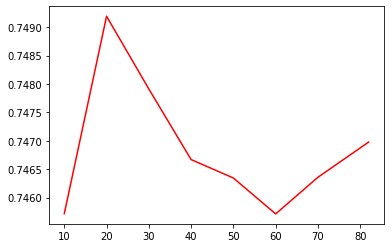

In [5]:
drawXGBClassifierPerformenceCurve()

# **Random forest Classifier**

In [6]:
def apply_RandomForest_model():
  feature_list = [10, 20, 30, 40, 50,60, 70, 82]

  model_list = []
  accuracy_list = []
  auc_rf_list = []
  rou_score_list = []
  fpr_list =[]
  tpr_list = []

  for selected_feature in feature_list:
    X_train, X_test, y_train, y_test = splitPCAdata(selected_feature)
    model = RandomForestClassifier(n_estimators = 100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    model_list.append(model)
    accuracy_list.append(accuracy)

    test_pred_prob= model.predict_proba(X_test)
    test_pred_prob = test_pred_prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test,test_pred_prob, pos_label = 1)

    auc_rf = auc(fpr, tpr)
    rou_score = roc_auc_score(y_test, y_pred)

    auc_rf_list.append(auc_rf)
    rou_score_list.append(rou_score)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
  return (feature_list, accuracy_list, auc_rf_list, rou_score_list, fpr_list, tpr_list)

def drawRandomForestClassifierPerformenceCurve():
  XGB_tuple = apply_RandomForest_model()
  features = XGB_tuple[0]
  roc_auc_score_list = XGB_tuple[3]

  ypoints = np.array(roc_auc_score_list)
  xpoints = np.array(features)

  plt.plot(xpoints, ypoints, color = 'r')
  plt.xlabel = features
  plt.title = 'Random Forest Classifier model performence'
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7801261829652997


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7899053627760252


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7889589905362776


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7832807570977918


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7712933753943217


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7621451104100946


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.761198738170347


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7526813880126183


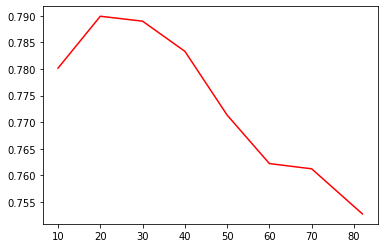

In [10]:
drawRandomForestClassifierPerformenceCurve()

# **LightGBM Classifier**

In [7]:
def apply_LIGHTGBM_model():
  feature_list = [10, 20, 30, 40, 50,60, 70, 82]

  model_list = []
  accuracy_list = []
  auc_rf_list = []
  rou_score_list = []
  fpr_list =[]
  tpr_list = []

  for selected_feature in feature_list:
    X_train, X_test, y_train, y_test = splitPCAdata(selected_feature)
    model = lgb.LGBMClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    model_list.append(model)
    accuracy_list.append(accuracy)

    test_pred_prob= model.predict_proba(X_test)
    test_pred_prob = test_pred_prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test,test_pred_prob, pos_label = 1)

    auc_rf = auc(fpr, tpr)
    rou_score = roc_auc_score(y_test, y_pred)

    auc_rf_list.append(auc_rf)
    rou_score_list.append(rou_score)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
  return (feature_list, accuracy_list, auc_rf_list, rou_score_list, fpr_list, tpr_list)

def drawLIGHTGBMPerformenceCurve():
  XGB_tuple = apply_LIGHTGBM_model()
  features = XGB_tuple[0]
  roc_auc_score_list = XGB_tuple[3]

  ypoints = np.array(roc_auc_score_list)
  xpoints = np.array(features)

  plt.plot(xpoints, ypoints, color = 'r')
  plt.xlabel = features
  plt.title = 'Random Forest Classifier model performence'
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7741324921135647


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7750788643533123


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7810725552050474


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7769716088328076


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7763406940063091


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7823343848580442


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7839116719242902


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7889589905362776


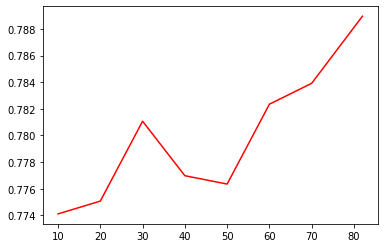

In [12]:
drawLIGHTGBMPerformenceCurve()

# **ADA Boost**

In [8]:
def apply_ADABOOST_model():
  feature_list = [10, 20, 30, 40, 50,60, 70, 82]

  model_list = []
  accuracy_list = []
  auc_rf_list = []
  rou_score_list = []
  fpr_list =[]
  tpr_list = []

  for selected_feature in feature_list:
    X_train, X_test, y_train, y_test = splitPCAdata(selected_feature)
    model = AdaBoostClassifier(random_state=96)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    model_list.append(model)
    accuracy_list.append(accuracy)

    test_pred_prob= model.predict_proba(X_test)
    test_pred_prob = test_pred_prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test,test_pred_prob, pos_label = 1)

    auc_rf = auc(fpr, tpr)
    rou_score = roc_auc_score(y_test, y_pred)

    auc_rf_list.append(auc_rf)
    rou_score_list.append(rou_score)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
  return (feature_list, accuracy_list, auc_rf_list, rou_score_list, fpr_list, tpr_list)

def drawADABOOSTPerformenceCurve():
  XGB_tuple = apply_ADABOOST_model()
  features = XGB_tuple[0]
  roc_auc_score_list = XGB_tuple[3]

  ypoints = np.array(roc_auc_score_list)
  xpoints = np.array(features)

  plt.plot(xpoints, ypoints, color = 'r')
  plt.xlabel = features
  plt.title = 'Random Forest Classifier model performence'
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7460567823343849


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7466876971608832


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7463722397476341


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7526813880126183


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7460567823343849


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7511041009463723


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7511041009463723


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7495268138801262


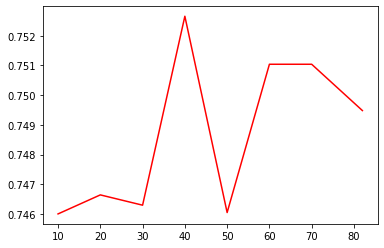

In [14]:
drawADABOOSTPerformenceCurve()

# **With Randomforest classifier using ADA Boost**

In [9]:
def apply_ADABOOST_UsingRandomForest_model():
  feature_list = [20, 40, 82]

  model_list = []
  accuracy_list = []
  auc_rf_list = []
  rou_score_list = []
  fpr_list =[]
  tpr_list = []

  for selected_feature in feature_list:
    X_train, X_test, y_train, y_test = splitPCAdata(selected_feature)
    model = AdaBoostClassifier(random_state=96, base_estimator=RandomForestClassifier(random_state=10), n_estimators = 100,learning_rate=0.1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    model_list.append(model)
    accuracy_list.append(accuracy)

    test_pred_prob= model.predict_proba(X_test)
    test_pred_prob = test_pred_prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test,test_pred_prob, pos_label = 1)

    auc_rf = auc(fpr, tpr)
    rou_score = roc_auc_score(y_test, y_pred)

    auc_rf_list.append(auc_rf)
    rou_score_list.append(rou_score)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
  return (feature_list, accuracy_list, auc_rf_list, rou_score_list, fpr_list, tpr_list)

def drawADABOOST_UsingRandomForestPerformenceCurve():
  XGB_tuple = apply_ADABOOST_UsingRandomForest_model()
  features = XGB_tuple[0]
  roc_auc_score_list = XGB_tuple[3]

  ypoints = np.array(roc_auc_score_list)
  xpoints = np.array(features)

  plt.plot(xpoints, ypoints, color = 'r')
  plt.xlabel = features
  plt.title = 'apply_ADABOOST_UsingRandomForest_model'
  plt.show()

In [ ]:
drawADABOOST_UsingRandomForestPerformenceCurve()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7684542586750789


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7552050473186119


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$


# **GradientBOOSTing**

In [10]:
def apply_GradientBOOSTing_model():
  feature_list = [10, 20, 30, 40, 50,60, 70, 82]

  model_list = []
  accuracy_list = []
  auc_rf_list = []
  rou_score_list = []
  fpr_list =[]
  tpr_list = []

  for selected_feature in feature_list:
    X_train, X_test, y_train, y_test = splitPCAdata(selected_feature)
    model = GradientBoostingClassifier()
    param_grid_clf = {"n_estimators": [50], "learning_rate": [0.1, 0.5, 1] }
    grid_search = GridSearchCV(model, param_grid_clf, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)
    cv_results = grid_search.cv_results_
    for mean_score, std_score, params in zip(cv_results["mean_test_score"], cv_results["std_test_score"], cv_results["params"]):
      print(mean_score, std_score, params)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    model_list.append(model)
    accuracy_list.append(accuracy)

    test_pred_prob= model.predict_proba(X_test)
    test_pred_prob = test_pred_prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test,test_pred_prob, pos_label = 1)

    auc_rf = auc(fpr, tpr)
    rou_score = roc_auc_score(y_test, y_pred)

    auc_rf_list.append(auc_rf)
    rou_score_list.append(rou_score)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
  return (feature_list, accuracy_list, auc_rf_list, rou_score_list, fpr_list, tpr_list)

def draw_GradientBOOSTing_PerformenceCurve():
  XGB_tuple = apply_GradientBOOSTing_model()
  features = XGB_tuple[0]
  roc_auc_score_list = XGB_tuple[3]

  ypoints = np.array(roc_auc_score_list)
  xpoints = np.array(features)

  plt.plot(xpoints, ypoints, color = 'r')
  plt.xlabel = features
  plt.title = 'apply_ADABOOST_UsingRandomForest_model'
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7380914826498423 0.011050581700055542 {'learning_rate': 0.1, 'n_estimators': 50}
0.7470031545741325 0.010826556329950375 {'learning_rate': 0.5, 'n_estimators': 50}
0.7478706624605678 0.012500932903121174 {'learning_rate': 1, 'n_estimators': 50}
0.7435331230283911


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7377760252365931 0.009447278036838274 {'learning_rate': 0.1, 'n_estimators': 50}
0.748422712933754 0.010099565043269492 {'learning_rate': 0.5, 'n_estimators': 50}
0.7482649842271294 0.01875844636885617 {'learning_rate': 1, 'n_estimators': 50}
0.7479495268138802


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7367507886435332 0.009544216040484641 {'learning_rate': 0.1, 'n_estimators': 50}
0.7509463722397477 0.018706983681075057 {'learning_rate': 0.5, 'n_estimators': 50}
0.754416403785489 0.012246595534690026 {'learning_rate': 1, 'n_estimators': 50}
0.7498422712933754


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7401419558359621 0.011365773438677554 {'learning_rate': 0.1, 'n_estimators': 50}
0.750236593059937 0.010235973305888052 {'learning_rate': 0.5, 'n_estimators': 50}
0.7494479495268139 0.010606009449167461 {'learning_rate': 1, 'n_estimators': 50}
0.7482649842271294


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7392744479495268 0.012756537694382182 {'learning_rate': 0.1, 'n_estimators': 50}
0.7513406940063092 0.011017324754006536 {'learning_rate': 0.5, 'n_estimators': 50}
0.7529179810725553 0.0073542859475550434 {'learning_rate': 1, 'n_estimators': 50}
0.7498422712933754


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7402996845425868 0.012634551832532741 {'learning_rate': 0.1, 'n_estimators': 50}
0.7519716088328077 0.0129443289844444 {'learning_rate': 0.5, 'n_estimators': 50}
0.7519716088328076 0.010291722566409985 {'learning_rate': 1, 'n_estimators': 50}
0.7498422712933754


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7389589905362776 0.011734634164956396 {'learning_rate': 0.1, 'n_estimators': 50}
0.7529179810725551 0.013962777293851147 {'learning_rate': 0.5, 'n_estimators': 50}
0.7517350157728707 0.011240868014256689 {'learning_rate': 1, 'n_estimators': 50}
0.749211356466877


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.739589905362776 0.012842061684122956 {'learning_rate': 0.1, 'n_estimators': 50}
0.7540220820189274 0.011103921707759024 {'learning_rate': 0.5, 'n_estimators': 50}
0.7565457413249211 0.005862544965314151 {'learning_rate': 1, 'n_estimators': 50}
0.7479495268138802


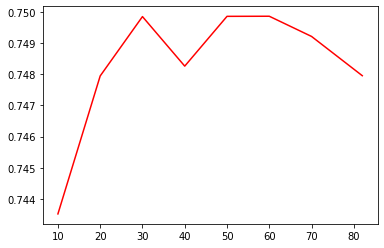

In [11]:
draw_GradientBOOSTing_PerformenceCurve()

In [23]:
plt.rcParams["figure.figsize"] = (10, 6)

#**All the Performance curves**

In [24]:
def all_curves():
  gradient_boosting_tuple = apply_GradientBOOSTing_model()
  gradient_boosting_features = gradient_boosting_tuple[0]
  gradient_boosting_roc_auc_score_list = gradient_boosting_tuple[3]
  gradient_boosting_xpoints = np.array(gradient_boosting_features)
  gradient_boosting_ypoints = np.array(gradient_boosting_roc_auc_score_list)

  ADABoost_tuple = apply_ADABOOST_model()
  ADABoost_features = ADABoost_tuple[0]
  ADABoost_roc_auc_score_list = ADABoost_tuple[3]
  ADABoost_ypoints = np.array(ADABoost_roc_auc_score_list)
  ADABoost_xpoints = np.array(ADABoost_features)

  LIGHTGBM_tuple = apply_LIGHTGBM_model()
  LIGHTGBM_features = LIGHTGBM_tuple[0]
  LIGHTGBM_roc_auc_score_list = LIGHTGBM_tuple[3]
  LIGHTGBM_ypoints = np.array(LIGHTGBM_roc_auc_score_list)
  LIGHTGBM_xpoints = np.array(LIGHTGBM_features)

  RandomForest_tuple = apply_RandomForest_model()
  RandomForest_features = RandomForest_tuple[0]
  RandomForest_roc_auc_score_list = RandomForest_tuple[3]
  RandomForest_ypoints = np.array(RandomForest_roc_auc_score_list)
  RandomForest_xpoints = np.array(RandomForest_features)

  XGB_tuple = apply_XGB_model()
  features = XGB_tuple[0]
  roc_auc_score_list = XGB_tuple[3]
  ypoints = np.array(roc_auc_score_list)
  xpoints = np.array(features)

  model_list = ['Gradient_Boosting', 'ADABoost', 'LIGHTGBM', 'RandomForest', 'XGB']

  plt.plot(gradient_boosting_xpoints, gradient_boosting_ypoints,label = "Gradient_Boosting",  color = 'r')
  plt.plot(ADABoost_xpoints, ADABoost_ypoints, label = "ADABoost", color = 'g')
  plt.plot(LIGHTGBM_xpoints, LIGHTGBM_ypoints, label = "LIGHTGBM", color = 'b')
  plt.plot(RandomForest_xpoints, RandomForest_ypoints, label = "RandomForest", color = 'y')
  plt.plot(xpoints, ypoints, label = "XGB",color = 'k')

  plt.xlabel = gradient_boosting_features
  plt.legend()
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7380914826498423 0.011050581700055542 {'learning_rate': 0.1, 'n_estimators': 50}
0.7469242902208202 0.01088042297778821 {'learning_rate': 0.5, 'n_estimators': 50}
0.7475552050473186 0.009312674712382021 {'learning_rate': 1, 'n_estimators': 50}
0.7435331230283911


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7378548895899054 0.009379223184428074 {'learning_rate': 0.1, 'n_estimators': 50}
0.7485804416403785 0.010641136536227376 {'learning_rate': 0.5, 'n_estimators': 50}
0.752602523659306 0.014761755414648744 {'learning_rate': 1, 'n_estimators': 50}
0.7479495268138802


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7367507886435332 0.009544216040484641 {'learning_rate': 0.1, 'n_estimators': 50}
0.7479495268138802 0.014145987669676287 {'learning_rate': 0.5, 'n_estimators': 50}
0.7521293375394322 0.013814999922195531 {'learning_rate': 1, 'n_estimators': 50}
0.7498422712933754


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7401419558359621 0.011365773438677554 {'learning_rate': 0.1, 'n_estimators': 50}
0.750236593059937 0.010644058560758979 {'learning_rate': 0.5, 'n_estimators': 50}
0.7499211356466876 0.010029735169821287 {'learning_rate': 1, 'n_estimators': 50}
0.7485804416403785


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7397476340694007 0.012432084203812664 {'learning_rate': 0.1, 'n_estimators': 50}
0.7511829652996845 0.01080182565821071 {'learning_rate': 0.5, 'n_estimators': 50}
0.7535488958990536 0.008061927563194338 {'learning_rate': 1, 'n_estimators': 50}
0.749211356466877


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7402996845425868 0.012634551832532741 {'learning_rate': 0.1, 'n_estimators': 50}
0.7516561514195584 0.013356744035545515 {'learning_rate': 0.5, 'n_estimators': 50}
0.7519716088328077 0.010483324308963635 {'learning_rate': 1, 'n_estimators': 50}
0.7504731861198738


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.73903785488959 0.011964010922119106 {'learning_rate': 0.1, 'n_estimators': 50}
0.7529968454258675 0.01356054151868909 {'learning_rate': 0.5, 'n_estimators': 50}
0.751577287066246 0.011469274110606466 {'learning_rate': 1, 'n_estimators': 50}
0.749211356466877


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7396687697160884 0.0127199180820746 {'learning_rate': 0.1, 'n_estimators': 50}
0.754179810725552 0.010955050696646911 {'learning_rate': 0.5, 'n_estimators': 50}
0.7562302839116719 0.005840223527310306 {'learning_rate': 1, 'n_estimators': 50}
0.7479495268138802


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7460567823343849


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7466876971608832


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7463722397476341


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7526813880126183


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7460567823343849


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7511041009463723


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7511041009463723


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7495268138801262


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7741324921135647


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7750788643533123


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7810725552050474


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7769716088328076


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7763406940063091


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7823343848580442


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7839116719242902


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7889589905362776


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7807570977917981


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7832807570977918


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7864353312302839


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7861198738170347


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7757097791798108


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7618296529968455


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7602523659305994


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7630914826498423


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7457413249211357


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.749211356466877


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7479495268138802


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7466876971608832


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7463722397476341


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7457413249211357


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7463722397476341


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7470031545741325


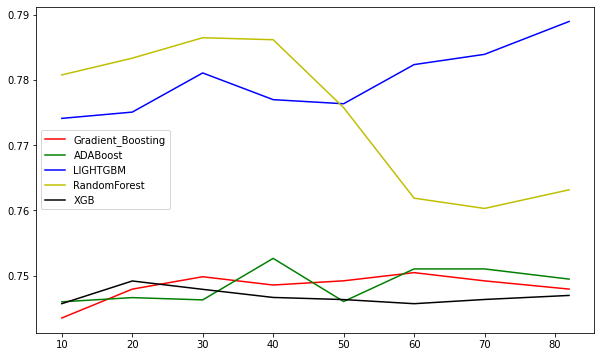

In [25]:
all_curves()

# ***ROC curves for LIGHTGBM***

In [102]:
def draw_getROCCurve():
  LIGHTGBM_tuple = apply_LIGHTGBM_model()
  LIGHTGBM_features = np.array(LIGHTGBM_tuple[0])
  LIGHTGBM_auc_rf = np.array(LIGHTGBM_tuple[2])
  LIGHTGBM_fpr = np.array(LIGHTGBM_tuple[4])
  LIGHTGBM_tpr = np.array(LIGHTGBM_tuple[5])

  colors_list = ['purple', 'blue', 'darkturquoise', 'steelblue', 'magenta', 'darkorange', 'lime', 'lightcoral']


  plt.figure(figsize=(9,6))
  for features, fpr, tpr, auc_rf, colour in zip(LIGHTGBM_features, LIGHTGBM_fpr, LIGHTGBM_tpr,LIGHTGBM_auc_rf, colors_list):
    plt.plot(fpr, tpr, color=colour, label='ROC curve of {0} features (area = {1:0.5f})'''.format(features, auc_rf))
  plt.plot([0,1], '--')
  plt.title('ROC curves for LIGHTGBM')
  plt.legend(loc='lower right') 
  plt.grid()
  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7741324921135647


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7750788643533123


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7810725552050474


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7769716088328076


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7763406940063091


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7823343848580442


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7839116719242902


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


 $$$$$$$ I am done my dear $$$$$$$$$
0.7889589905362776


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


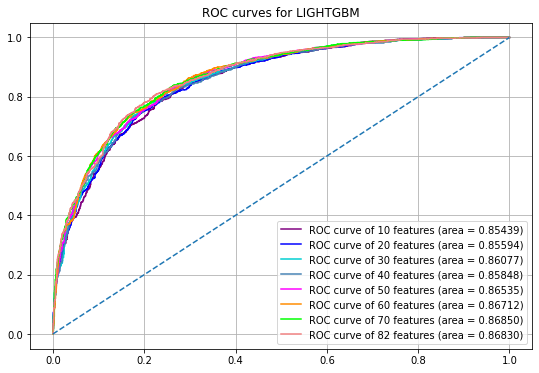

In [103]:
draw_getROCCurve()

# **Exploratory analysis of the dataset**

In [104]:
stock_market_datFrame = createDataFrame()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [105]:
stock_market_datFrame.describe()

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU,Match
count,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,...,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000,15850.000000
mean,15435.246790,-0.427318,0.000446,0.000447,0.000449,0.000449,0.219571,0.432153,0.649702,0.870955,15357.884463,15273.232821,15023.875450,13825.270590,0.159430,0.189338,0.259739,1.453769,2.357214,-0.000440,-0.020175,4.099151,5.072097,-0.000015,0.000215,0.000010,-0.000022,0.000127,0.000159,0.000031,0.000054,0.000071,0.000076,0.000059,0.000021,0.000210,0.000191,0.000475,0.000468,0.000211,...,0.000320,2.197784,2.167876,2.097475,0.029908,0.100309,0.972946,2.714883,4.812358,4.882760,4.912668,-0.001682,-0.006120,-0.007198,-0.005158,0.016529,0.021364,0.000361,0.006213,0.039770,0.042662,-0.006742,0.016922,0.022149,0.022204,0.021486,0.063288,0.007163,0.045286,-0.001184,-0.047435,0.064076,0.044025,-0.001885,0.011049,0.010674,-0.013523,0.010225,0.009913,0.490789
std,3342.634085,46.150805,0.008682,0.008681,0.008681,0.008681,1.852757,2.449220,2.977363,3.359731,3466.511260,3598.596120,3967.532146,5359.380166,0.242997,0.269914,0.296033,0.485248,0.603857,0.030875,0.141030,0.637161,0.708446,0.004770,0.005490,0.004555,0.001619,0.005671,0.006992,0.004775,0.003090,0.005835,0.004986,0.005502,0.004091,0.013017,0.009518,0.012409,0.009336,0.011101,...,0.009773,0.664867,0.676937,0.694265,0.046360,0.082761,0.259917,0.459190,0.843027,0.830649,0.815976,0.143234,0.101697,0.093455,0.710831,1.921174,1.306525,1.415157,2.071060,1.228841,0.860037,0.598137,0.954659,1.317836,1.167907,1.005227,1.042886,2.731609,1.347027,0.753027,1.944944,1.254920,0.942896,0.742832,0.483753,0.494974,1.934279,1.833282,1.028376,0.499931
min,9686.480469,-1407.483531,-0.055464,-0.055464,-0.055464,-0.055464,-10.901642,-14.158489,-14.731013,-14.695105,0.000000,0.000000,0.000000,0.000000,-0.030000,-0.020000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-0.027657,-0.031467,-0.018905,-0.011837,-0.123558,-0.126568,-0.065415,-0.032696,-0.094149,-0.113995,-0.090440,-0.061882,-0.080425,-0.046673,-0.068233,-0.066634,-0.066010,...,-0.070507,0.000000,0.000000,0.000000,-0.270000,-0.190000,0.000000,-2.400000,-1.340000,-1.210000,-1.030000,-1.000000,-1.000000,-1.000000,-3.790000,-8.570000,-8.080000,-7.250000,-8.670000,-6.630000,-5.930000,-2.620000,-4.830000,-9.350000,-7.390000,-6.180000,-6.810000,-11.250000,-8.670000,-4.120000,-17.750000,-7.540000,-7.220000,-15.760000,-2.390000,-4.280000,-11.060000,-12.930000,-8.490000,0.000000
25%,12496.379883,-1.293110,-0.003153,-0.003153,-0.003153,-0.003153,-0.687231,-0.840375,-0.851945,-0.805191,12473.361474,12474.202558,12350.498999,11888.499768,0.020000,0.030

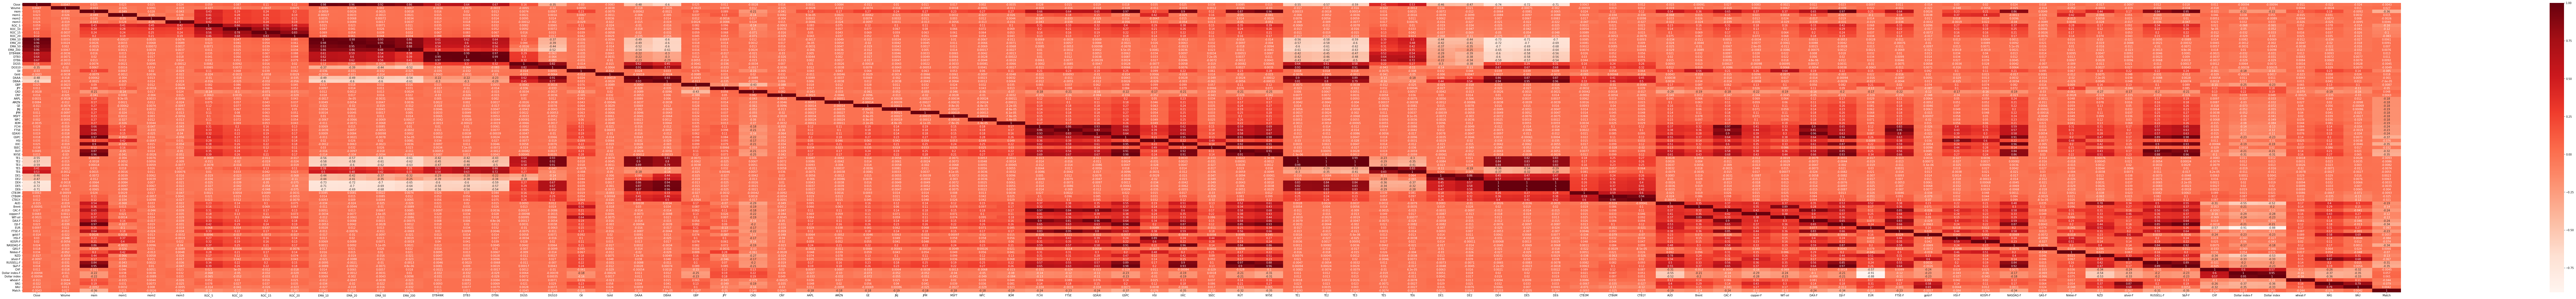

In [116]:
corr = stock_market_datFrame.corr()
plt.figure(figsize=(200,20))
sns.heatmap(corr, annot=True, cmap = 'Reds')
plt.show()